# Titanic

In [42]:
#imports
# manejo bbdd
import pandas as pd
import numpy as np
import datetime
#gráficas
import matplotlib.pyplot as plt
#matplotlib inline
import seaborn as sns
#estadística
import math
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew
#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#modelos y evaluación
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error,r2_score

In [20]:
titanic = pd.read_csv(r'/Users/gabrielrogetdeaysa/Library/CloudStorage/GoogleDrive-rogetaysa@gmail.com/La meva unitat/IronhackGD/Repoironhack/Entregas/44/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64
Survived Survived
0    549
1    342
Name: count, dtype: int64


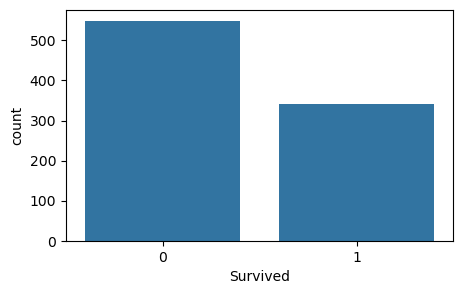

Pclass Pclass
3    491
1    216
2    184
Name: count, dtype: int64


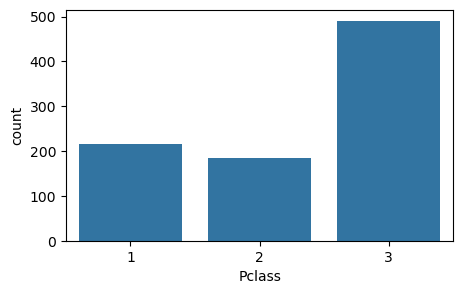

Name Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
Sex Sex
male      577
female    314
Name: count, dtype: int64


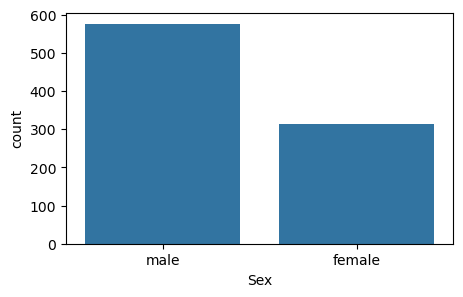

Age Age
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 89, dtype: int64
SibSp SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


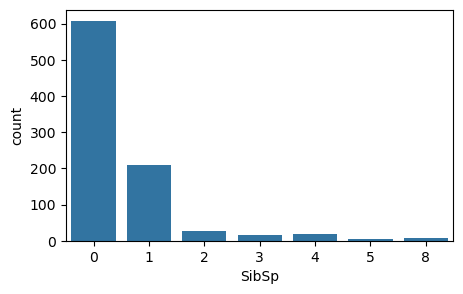

Parch Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


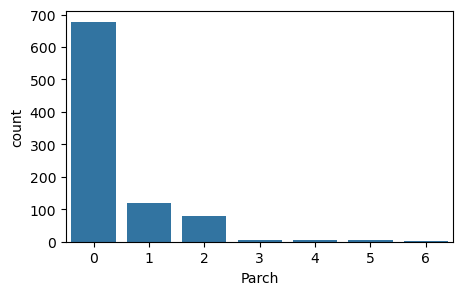

Ticket Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
Fare Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64


In [ ]:
#anàlisis dels camps: veure quants hi ha per categoria
columnes = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare']
for col in columnes:
    print(col, titanic[col].value_counts(dropna=False))
    if titanic[col].nunique() <15:
        plt.figure(figsize=(5,3))
        sns.countplot(data=titanic, x=col)
#        plt.xticks(rotation=45)
        plt.show()


In [7]:
titanic.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

In [ ]:
# veure valors nuls
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

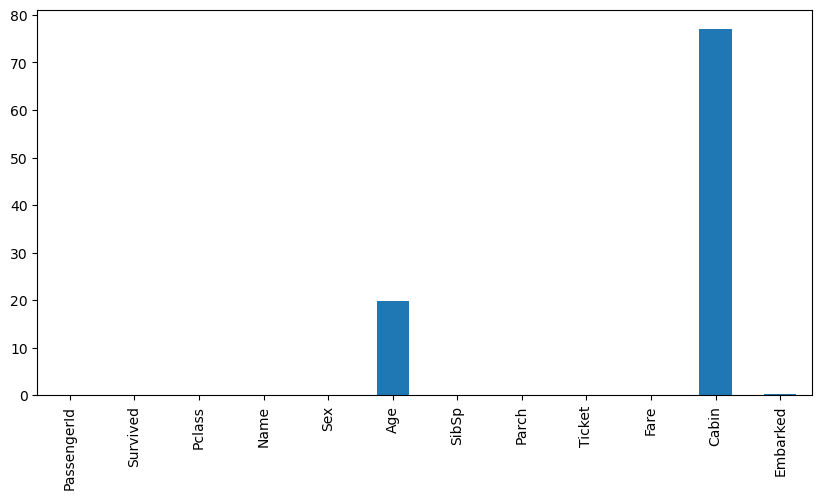

In [28]:
plt.figure(figsize=(10,5))
(titanic.isnull().mean()*100).plot(kind='bar')
plt.show()

In [29]:
#eliminem columnes amb 50% de nuls
limit = 0.5
columnes_eliminar = [col for col in titanic.columns if titanic[col].isnull().mean() > 0.5]
display(columnes_eliminar)

['Cabin']

In [33]:
titanic2 = titanic.drop(columns=["Cabin", "Ticket"])
titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
df["title"] = df["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())
df["title"].replace("Mlle", "Mrs", inplace=True)
df["title"].replace("Ms", "Miss", inplace=True)
df["title"].replace("Mme", "Miss", inplace=True)
df["title"].replace("Don", "Mr", inplace=True)
df["title"].replace(df["title"].value_counts().index[4:], "Other", inplace=True)
 


4.1. Activity
Para las distintas variables numéricas
- Explorar nulls
- Explorar outliers
- Explorar correlaciones entre variables numérica

In [34]:
# Seleccionar variables numéricas
numericas = titanic2.select_dtypes(include=['float64', 'int64'])

# Mostrar las primeras filas para verificar
print(numericas.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500


In [35]:
# Calcular la matriz de correlación
matriz_corr = numericas.corr()

# Mostrar la matriz
print(matriz_corr)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


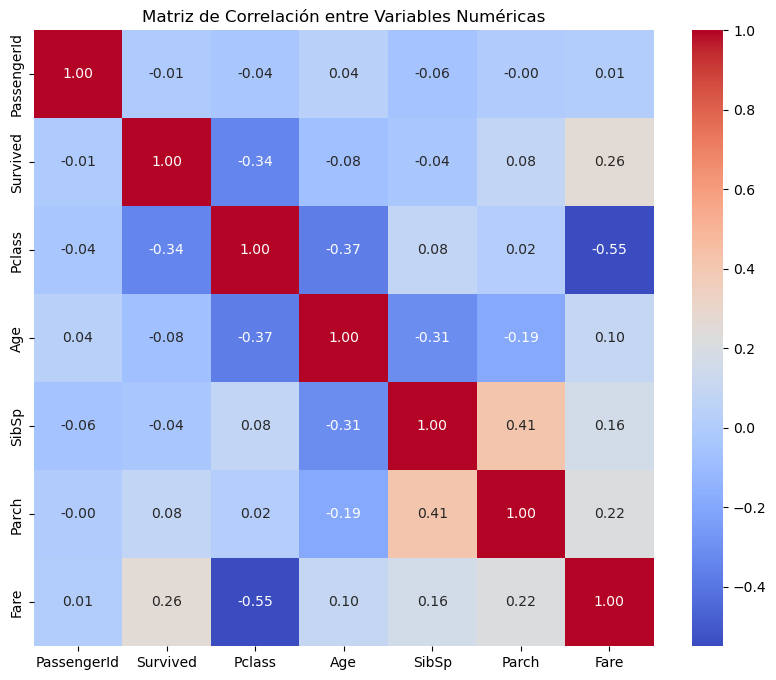

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

In [40]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/var/folders/qp/2_6279bj5gg1whljcz1prc680000gn/T/ipykernel_26437/1531562597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SexSurvived']=df.apply(lambda row: 'Dones superv' if row['Sex'] =='female' and row['Survived'] == 1 else


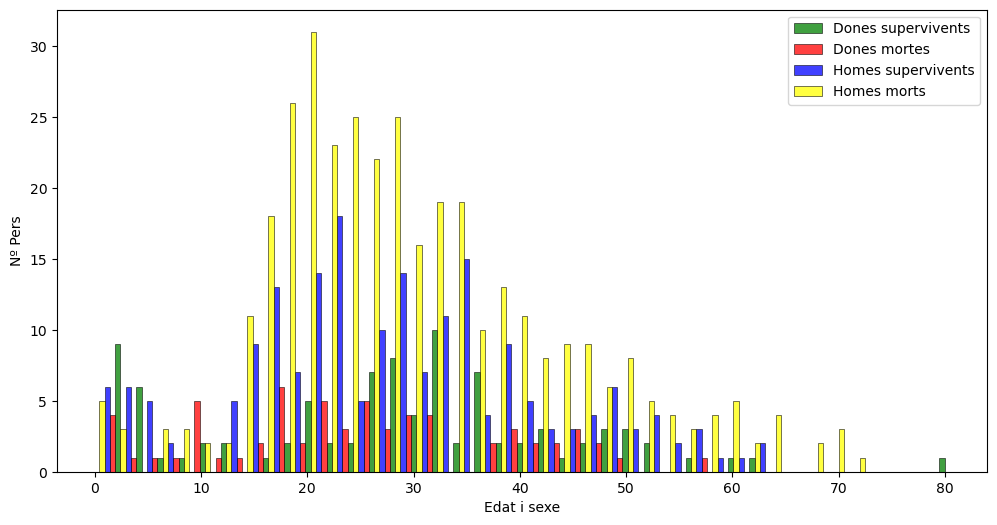

In [58]:
df= titanic.dropna(subset=['Age','Sex','Survived'])
df['SexSurvived']=df.apply(lambda row: 'Dones superv' if row['Sex'] =='female' and row['Survived'] == 1 else
                           'Dones mortes' if row['Sex'] =='female' and row['Survived'] == 0 else 
                           'Homes superv' if row['Sex'] =='male' and row['Survived'] == 1 else 
                           'Homes morts' , axis = 1 
                           )

custom_palette = {
    'Dones superv': 'blue',
    'Dones mortes': 'red',
    'Homes superv': 'green',
    'Homes morts': 'yellow'
}

age_sex_totals = df.groupby(['Age', 'Sex']).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Age', hue='SexSurvived', multiple='dodge', palette=custom_palette, binwidth=2, element='bars')
#sns.histplot(data=df, x = 'Age', hue='SexSurvived', multiple='dodge', palette=custom_palette, binwidth=5)

#plt.plot(age_sex_totals.index, age_sex_totals['male'], linestyle='--', color='blue', label='Homes totals per edat')
#plt.plot(age_sex_totals.index, age_sex_totals['female'], linestyle='--', color='green', label='Dones totals per edat')

plt.xlabel('Edat i sexe')
plt.ylabel('Nº Pers')
plt.legend(['Dones supervivents', 'Dones mortes', 'Homes supervivents', 'Homes morts','Dones totals','Homes totals'])

plt.show()


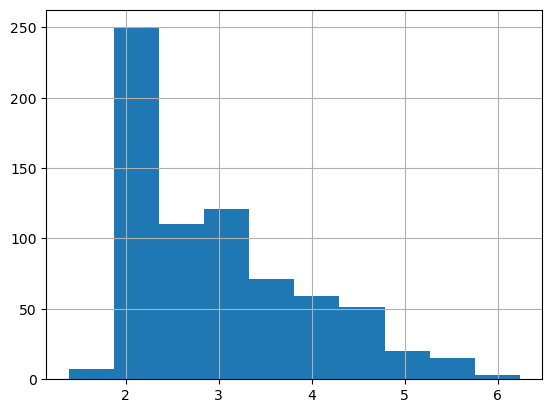

In [59]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN
pd.Series(map(log_transfom_clean_, df.Fare)).hist()
plt.show()
def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN